<a href="https://colab.research.google.com/github/FereBell/IntroduccionDeepLearning/blob/master/Codigo_Bicicleta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias necesarias para el código

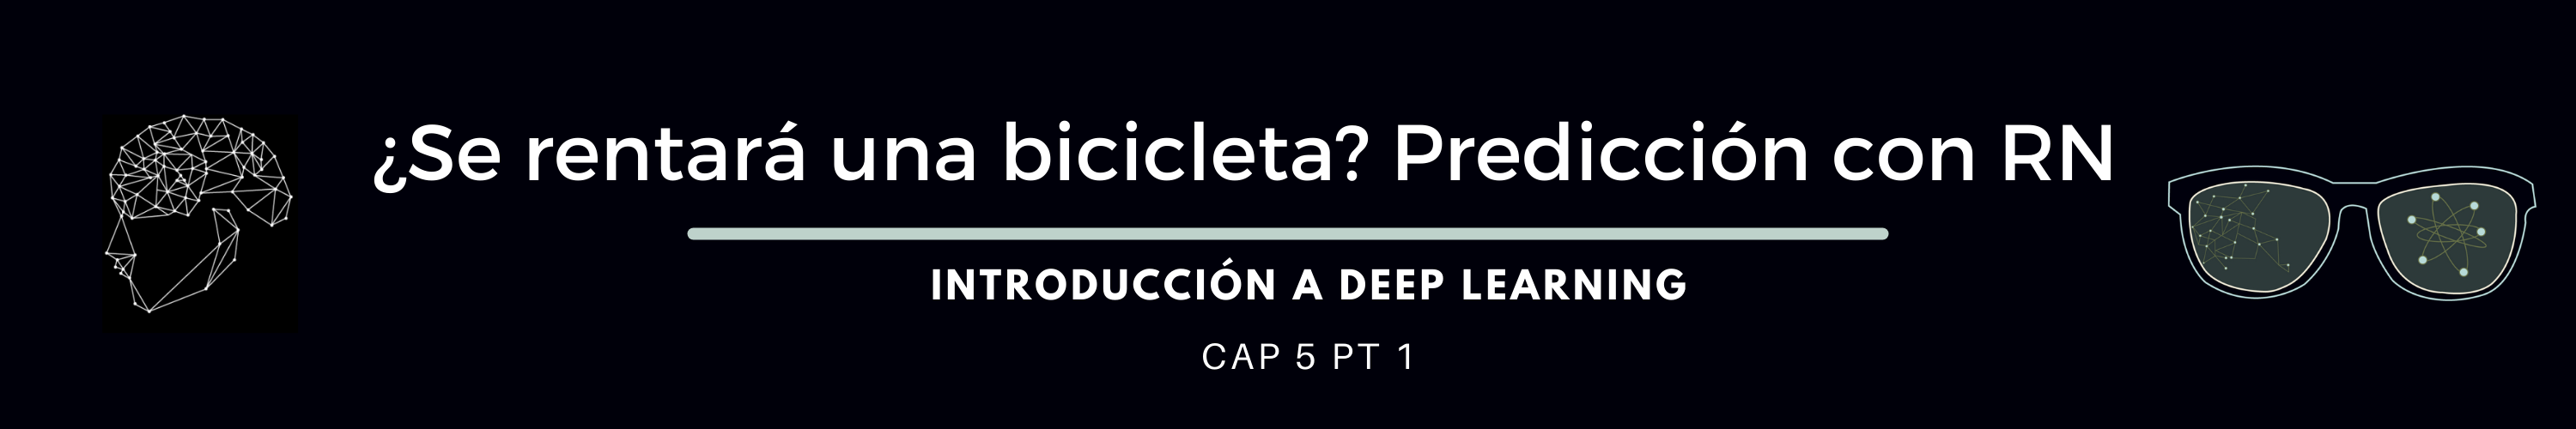

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import csv

In [ ]:
# Importando la base de datos a Colab
from google.colab import files
files.upload()

In [ ]:
# Pasando los archivos
def obt_datos(path_entre, path_salida):
    ent = pd.read_csv(path_entre)

    sal = pd.read_csv(path_salida)
    
    return ent, sal

datos_ent, datos_sal= obt_datos('Entrada.csv', 'Salida.csv')

## Descripción de la base de datos



* Season: 1_Primavera, 2_Verano, 3_Otoño, 4_Invierno


* Mes: 1 al 12

* Hr: 0 a 23

* Holiday: 0 o 1 es o no día feriado

* Weekday: Día de la semana 0 a 6

* Workingday: Si es fin de semana o feriado 0 de otro modo 1

* Weathersit:
  - 1 (Cielo limpio, pocas nubes, etc)
  - 2 (Nublado)
  - 3 (Rayos, poca lluvia) 
  - 4 (Lluvia fuerte, tormenta o nevando)

* Temp: Temperatura en Celcius

* Atemp: Sensación termina en Celcius

* Hum: Humedad normalizada de 0 a 100

* Windspeed: Velocidad del viento normalizado de 0 a 67

In [ ]:
# Mostrando DataFrame de los datos
datos_ent

### Se convierten los datos en arreglo con numpy 

In [ ]:
mat_entrada = datos_ent.to_numpy()
mat_salida = datos_sal.to_numpy()

In [ ]:
# Dividimos los datos para entrenamiento y validación
def separacion_datos(ent, sal):
  ent_e= ent[:round(len(ent)*.9)-1]
  ent_s= sal[:round(len(sal)*.9)-1]
  
  val_e= ent[round(len(ent)*.9)-1:]
  val_s= sal[round(len(sal)*.9)-1:]

  return ent_e, ent_s, val_e, val_s
  

In [ ]:
ent_e, ent_s, val_e, val_s= separacion_datos(mat_entrada, mat_salida)

In [ ]:
# Diseño de la red
tam_entrada= layers.Input(shape= (ent_e.shape[1]))
x= layers.Dense(128, activation= 'relu')(tam_entrada)
x= layers.Dense(254, activation= 'relu')(x)
x= layers.Dense(512, activation= 'relu')(x)
salida= layers.Dense(1, activation= 'sigmoid')(x)

model= tf.keras.Model(inputs= tam_entrada, outputs= salida)

model.compile(optimizer='rmsprop', loss= 'binary_crossentropy', metrics= 'accuracy')

In [ ]:
# Comenzamos el entrenamiento
model.fit(ent_e, ent_s, batch_size=64, epochs= 200, validation_data= (val_e, val_s))